In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("C:/Users/chahd/Desktop/Online Retail.csv", dtype={'InvoiceNo': 'object'})
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df1 = df[df['UnitPrice'] != 0].copy()

In [11]:
df1.drop_duplicates(inplace=True)

In [13]:
 missing_values = df1.isnull().sum()
 print("Missing values per column:")
 print(missing_values)

Missing values per column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [15]:
negative_df = df1[df1['Quantity'] < 0]

In [17]:

most_returned = (
    negative_df
    .groupby(['StockCode', 'Description'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity') 
)
print(most_returned.head(20)) 

     StockCode                          Description  Quantity
1529     23843          PAPER CRAFT , LITTLE BIRDIE    -80995
1270     23166       MEDIUM CERAMIC TOP STORAGE JAR    -74494
1688     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9376
1972         M                               Manual     -4066
133      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
1859    85123A   WHITE HANGING HEART T-LIGHT HOLDER     -2578
158      21175          GIN + TONIC DIET METAL SIGN     -2030
1079     22920                    HERB MARKER BASIL     -1527
624      22273                 FELTCRAFT DOLL MOLLY     -1447
1578    47566B               TEA TIME PARTY BUNTING     -1424
3        15034          PAPER POCKET TRAVELING FAN      -1385
96       20971     PINK BLUE FELT CRAFT TRINKET BOX     -1321
1679     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS     -1200
1970         D                             Discount     -1194
1612     71477    COLOUR GLASS. STAR T-LIGHT HOLDER     -1174
1851    

C:\Users\chahd\AppData\Local\Temp\ipykernel_11748\825304129.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


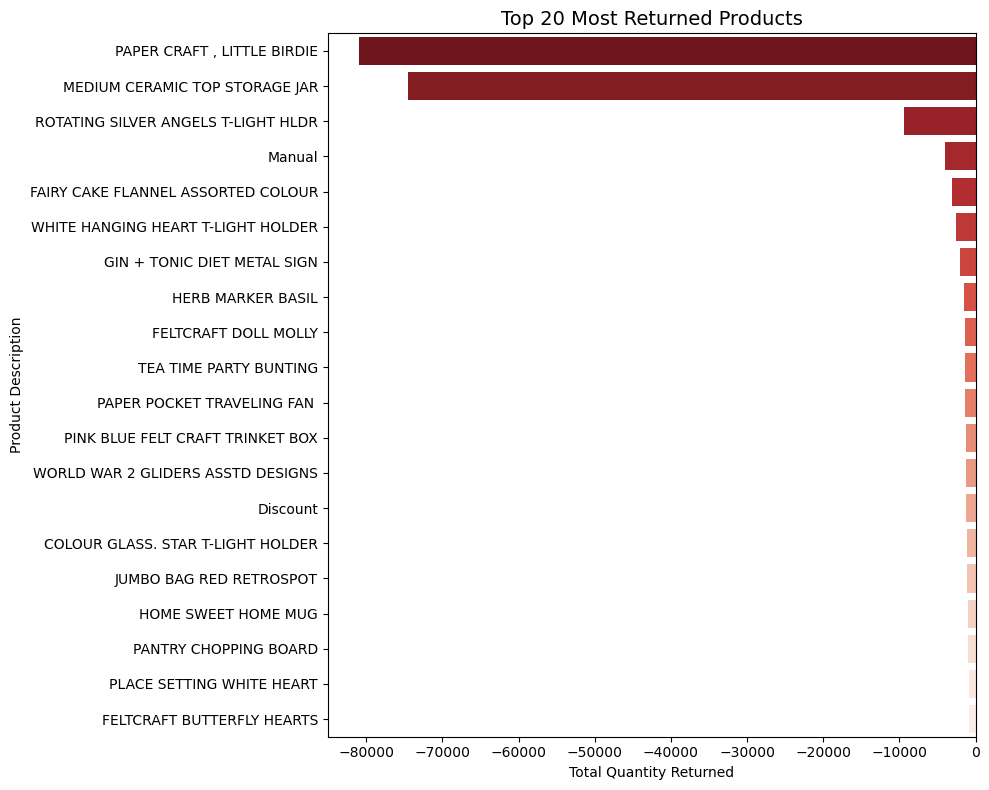

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns


top20_returns = most_returned.head(20).copy()

# Reverse order for better visual (so most returned at the top)
top20_returns = top20_returns.sort_values(by='Quantity', ascending=True)

# Set the plot size
plt.figure(figsize=(10, 8))

# Plot horizontal bar chart
sns.barplot(
    data=top20_returns,
    x='Quantity',
    y='Description',
    palette='Reds_r'
)

# Titles and labels
plt.title('Top 20 Most Returned Products', fontsize=14)
plt.xlabel('Total Quantity Returned')
plt.ylabel('Product Description')

# Tight layout for spacing
plt.tight_layout()

plt.show()

In [20]:
total_quantity = df1.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

negative_stockcodes = set(df1[df1['Quantity'] < 0]['StockCode'])

not_returned = total_quantity[~total_quantity['StockCode'].isin(negative_stockcodes)]

top_not_returned = not_returned.sort_values(by='Quantity', ascending=False)

print(top_not_returned.head(20))

     StockCode                          Description  Quantity
33       16014          SMALL CHINESE STYLE SCISSOR     13328
142      20668      DISCO BALL CHRISTMAS DECORATION     12883
3245     84568      GIRLS ALPHABET IRON ON PATCHES      12442
2302     23310              BUBBLEGUM RING ASSORTED     12050
3146     84212        ASSORTED FLOWER COLOUR "LEIS"     10315
1526     22610             PENS ASSORTED FUNNY FACE      9572
39       16045           POPART WOODEN PENCILS ASST      8900
955      21985    PACK OF 12 HEARTS DESIGN TISSUES       8775
367      21094        SET/6 RED SPOTTY PAPER PLATES      8758
638      21497            FANCY FONTS BIRTHDAY WRAP      8550
362      21086          SET/6 RED SPOTTY PAPER CUPS      7121
1652     22740                         POLKADOT PEN      6842
641      21500                  PINK POLKADOT WRAP       6350
2300     23308   SET OF 60 VINTAGE LEAF CAKE CASES       6139
115      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      5884
48      

C:\Users\chahd\AppData\Local\Temp\ipykernel_11748\2957383041.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


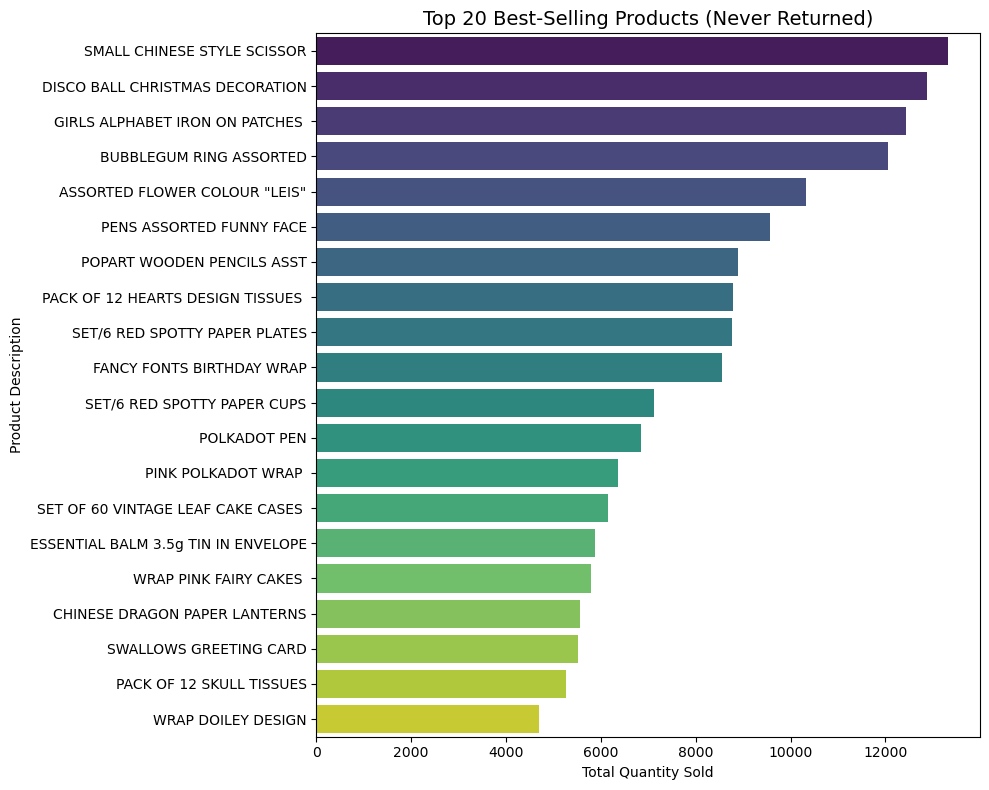

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take the top 20 products that were never returned
top20 = top_not_returned.head(20)

# Sort for better visuals (descending order)
top20 = top20.sort_values(by='Quantity', ascending=False)  # ascending so highest is on top in horizontal bar

# Set the plot size
plt.figure(figsize=(10, 8))

# Create horizontal bar plot
sns.barplot(
    data=top20,
    x='Quantity',
    y='Description',
    palette='viridis'
)

# Title and labels
plt.title('Top 20 Best-Selling Products (Never Returned)', fontsize=14)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')

# Tight layout for better spacing
plt.tight_layout()

plt.show()

In [22]:
positive_df = df1[df1['Quantity'] > 0]

# Sum positive quantity per CustomerID
customer_qty_sum = positive_df.groupby('CustomerID')['Quantity'].sum()

# Get top 10 customers by total positive quantity
top_10_customers = customer_qty_sum.sort_values(ascending=False).head(10).index.tolist()

print("Top 10 customers by total positive quantity:")
print(customer_qty_sum.loc[top_10_customers])

top_customers_data = positive_df[positive_df['CustomerID'].isin(top_10_customers)]

grouped = top_customers_data.groupby(['CustomerID', 'StockCode', 'Description'])['Quantity'].sum().reset_index()

idx = grouped.groupby('CustomerID')['Quantity'].idxmax()
most_purchased_products = grouped.loc[idx]

most_purchased_products = most_purchased_products.sort_values('Quantity', ascending=False)

print(most_purchased_products)

Top 10 customers by total positive quantity:
CustomerID
15287    420853
14646    196915
16446     80997
14911     80240
12415     77374
12346     74215
17450     69973
17511     64549
18102     64124
13694     63312
Name: Quantity, dtype: int64
      CustomerID StockCode                      Description  Quantity
6853       16446     23843      PAPER CRAFT , LITTLE BIRDIE     80995
0          12346     23166   MEDIUM CERAMIC TOP STORAGE JAR     74215
4481       15287     22355        CHARLOTTE BAG SUKI DESIGN      9177
7472       18102     22189          CREAM HEART CARD HOLDER      5946
6902       17450     22469            HEART OF WICKER SMALL      5286
1290       14646     23084               RABBIT NIGHT LIGHT      4801
154        12415     22492          MINI PAINT SET VINTAGE       2916
6984       17511     20668  DISCO BALL CHRISTMAS DECORATION      2304
466        13694     16216    LETTER SHAPE PENCIL SHARPENER      1600
2551       14911     22952  60 CAKE CASES VINTAGE CHRIS

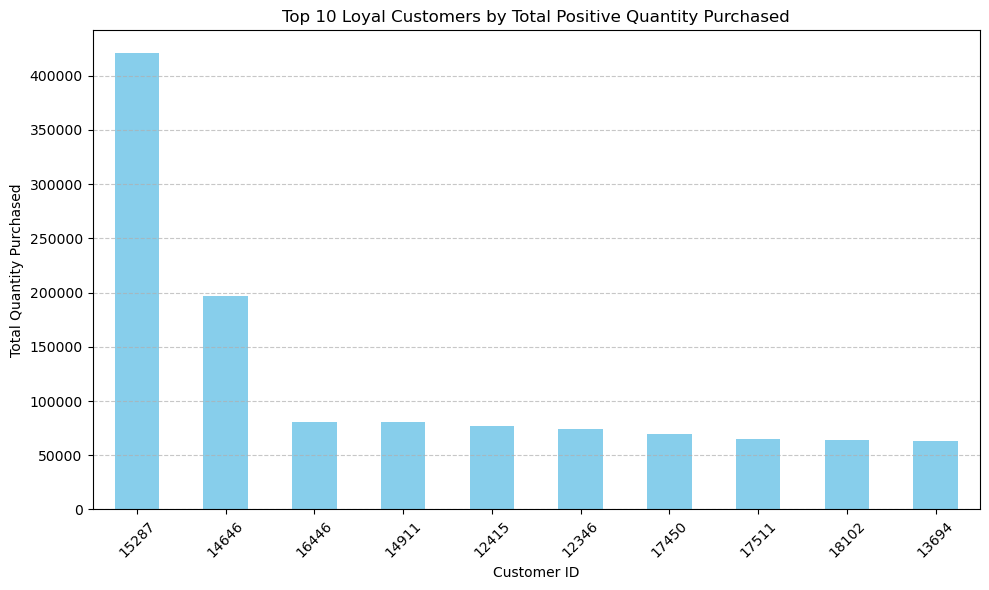

In [23]:
import matplotlib.pyplot as plt

# Assuming 'customer_qty_sum' is already defined
top_10_customers = customer_qty_sum.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Loyal Customers by Total Positive Quantity Purchased')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

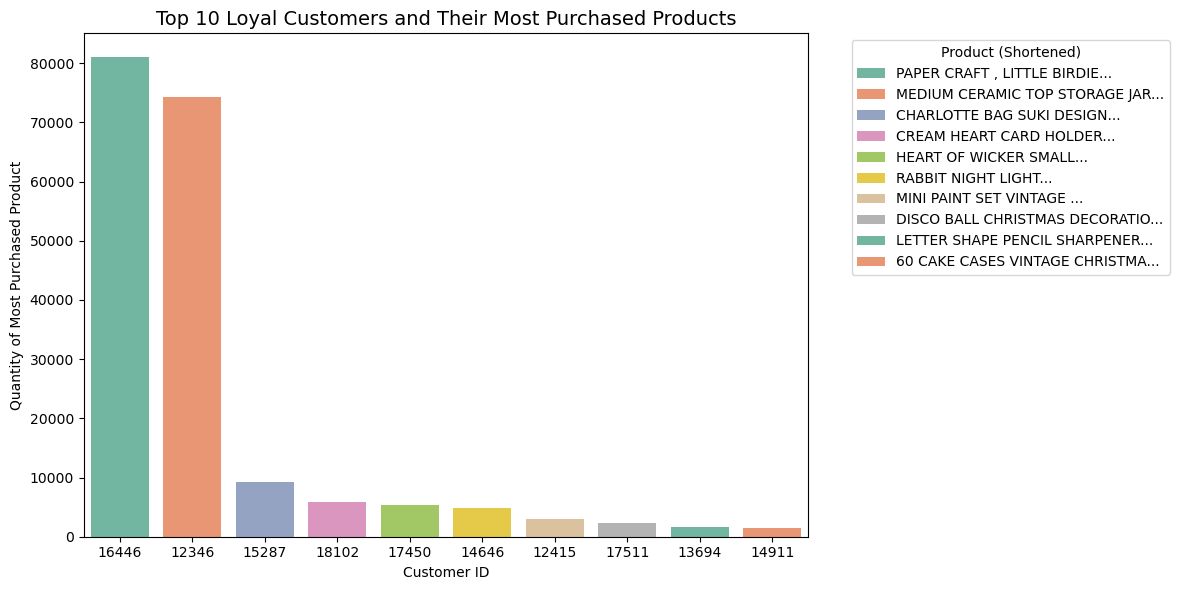

In [24]:
viz_df = most_purchased_products.copy()

# Shorten long descriptions for display
viz_df['ShortDescription'] = viz_df['Description'].str.slice(0, 30) + '...'

# Convert CustomerID to string for plotting
viz_df['CustomerID'] = viz_df['CustomerID'].astype(str)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot
sns.barplot(
    data=viz_df,
    x='CustomerID',
    y='Quantity',
    hue='ShortDescription',
    dodge=False,
    palette='Set2'
)

# Titles and labels
plt.title('Top 10 Loyal Customers and Their Most Purchased Products', fontsize=14)
plt.xlabel('Customer ID')
plt.ylabel('Quantity of Most Purchased Product')

# Remove legend title
plt.legend(title='Product (Shortened)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [25]:
paper_craft_df = df1[df1['Description'] == 'PAPER CRAFT , LITTLE BIRDIE']
paper_craft_negative = paper_craft_df[paper_craft_df['Quantity'] < 0]
returner_summary = paper_craft_negative.groupby('CustomerID')['Quantity'].sum().reset_index()
print(returner_summary)

   CustomerID  Quantity
0       16446    -80995


In [27]:
client_id = 16446
client_df = df1[df1['CustomerID'] == client_id]

print("All transactions of Customer 16446:")
print(client_df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate']])

All transactions of Customer 16446:
       InvoiceNo StockCode                  Description  Quantity  \
194354    553573     22980       PANTRY SCRUBBING BRUSH         1   
194355    553573     22982          PANTRY PASTRY BRUSH         1   
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  
194354 2011-05-18 09:52:00  
194355 2011-05-18 09:52:00  
540421 2011-12-09 09:15:00  
540422 2011-12-09 09:27:00  


In [29]:
purchases = client_df[client_df['Quantity'] > 0]
returns = client_df[client_df['Quantity'] < 0]

print("Purchased products:")
print(purchases[['InvoiceNo', 'StockCode', 'Description', 'Quantity']])

print("\nReturned products:")
print(returns[['InvoiceNo', 'StockCode', 'Description', 'Quantity']])

Purchased products:
       InvoiceNo StockCode                  Description  Quantity
194354    553573     22980       PANTRY SCRUBBING BRUSH         1
194355    553573     22982          PANTRY PASTRY BRUSH         1
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995

Returned products:
       InvoiceNo StockCode                  Description  Quantity
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995


In [32]:
latest_purchase = df1.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# Calculate recency in days (relative to dataset max date)
max_date = df1['InvoiceDate'].max()
latest_purchase['Recency'] = (max_date - latest_purchase['InvoiceDate']).dt.days

latest_purchase.head()

,CustomerID,InvoiceDate,Recency
0,12346,2011-01-18 10:17:00,325
1,12347,2011-12-07 15:52:00,1
2,12348,2011-09-25 13:13:00,74
3,12349,2011-11-21 09:51:00,18
4,12350,2011-02-02 16:01:00,309


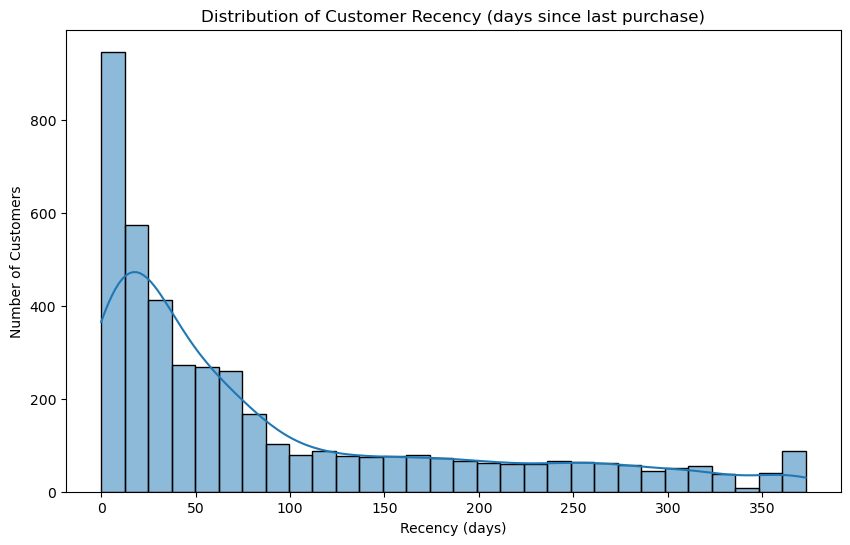

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(latest_purchase['Recency'], bins=30, kde=True)
plt.title('Distribution of Customer Recency (days since last purchase)')
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')
plt.show()

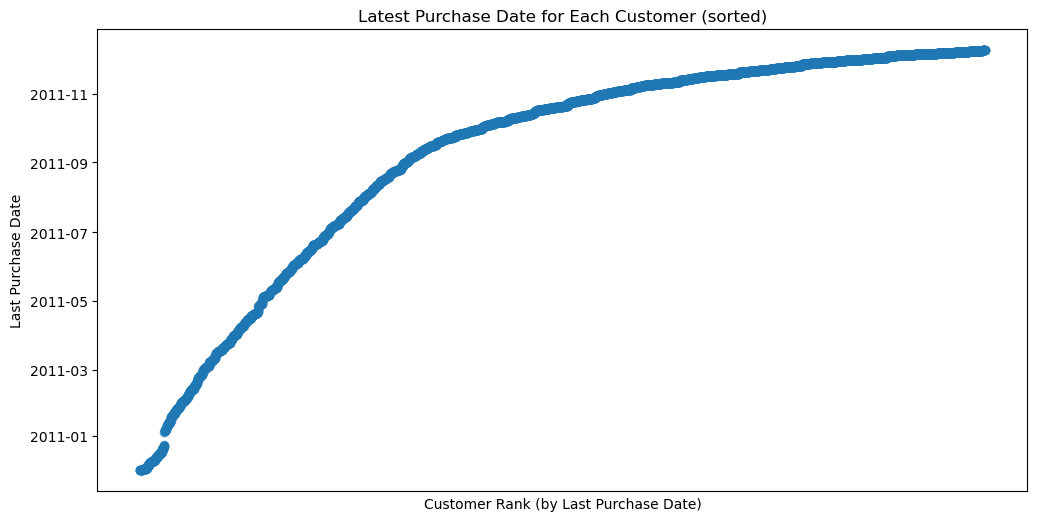

In [40]:
latest_purchase_sorted = latest_purchase.sort_values('InvoiceDate').reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.scatter(x=range(len(latest_purchase_sorted)), y=latest_purchase_sorted['InvoiceDate'], alpha=0.6)
plt.title('Latest Purchase Date for Each Customer (sorted)')
plt.xlabel('Customer Rank (by Last Purchase Date)')
plt.ylabel('Last Purchase Date')
plt.xticks([])
plt.show()

C:\Users\chahd\AppData\Local\Temp\ipykernel_11748\1950381056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customers_per_country, x='Country', y='NumCustomers', palette='viridis')


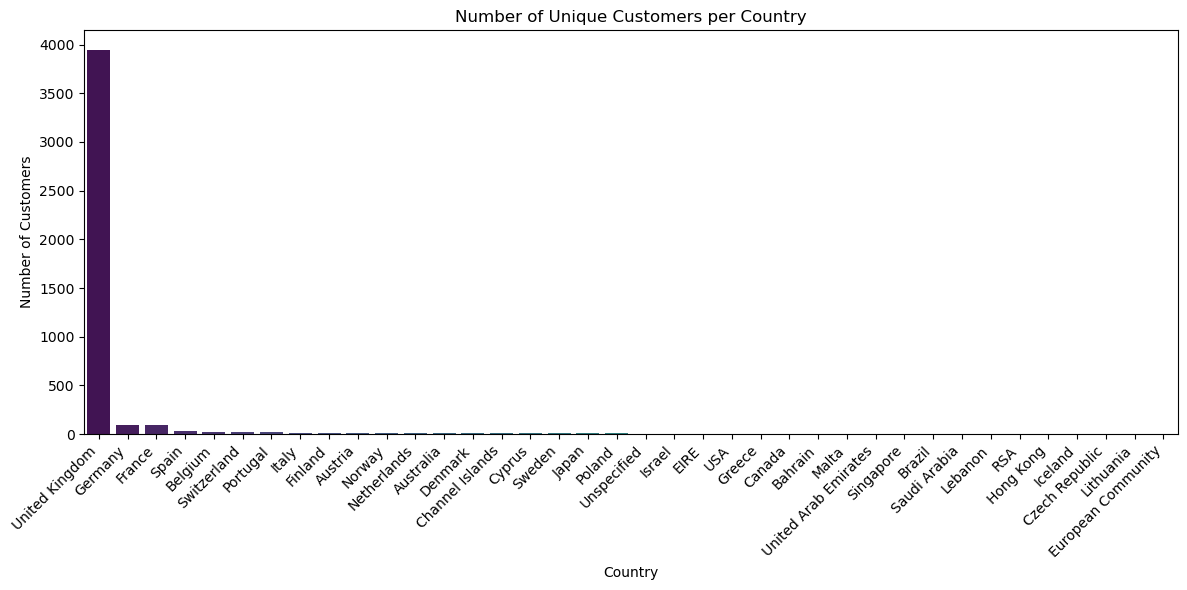

In [42]:
customers_per_country = df1.groupby('Country')['CustomerID'].nunique().reset_index()
customers_per_country.rename(columns={'CustomerID': 'NumCustomers'}, inplace=True)

# Sort countries by number of customers descending
customers_per_country = customers_per_country.sort_values(by='NumCustomers', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=customers_per_country, x='Country', y='NumCustomers', palette='viridis')

plt.title('Number of Unique Customers per Country')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [44]:
bad_customer_id = 16446
df1 = df1[df1['CustomerID'] != bad_customer_id]

purchase_freq = df1.groupby('CustomerID')['InvoiceNo'].nunique()

# AvgQuantity: average quantity purchased per invoice
avg_quantity = df1.groupby('CustomerID')['Quantity'].mean()

# AvgSpendPerPurchase: total spend divided by number of purchases
avg_spend = (
    df1.groupby('CustomerID')
    .apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum() / x['InvoiceNo'].nunique())
)

# ReturnRate: number of negative quantity rows / total rows per customer
returns = df1[df1['Quantity'] < 0].groupby('CustomerID')['Quantity'].count()
total = df1.groupby('CustomerID')['Quantity'].count()
return_rate = (returns / total).fillna(0)

# Step 4: Create feature DataFrame
behavior_df = pd.DataFrame({
    'PurchaseFrequency': purchase_freq,
    'AvgQuantity': avg_quantity,
    'AvgSpendPerPurchase': avg_spend,
    'ReturnRate': return_rate
})

behavior_df.head()



C:\Users\chahd\AppData\Local\Temp\ipykernel_11748\956795699.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum() / x['InvoiceNo'].nunique())


,PurchaseFrequency,AvgQuantity,AvgSpendPerPurchase,ReturnRate
CustomerID,,,,
12346,2,0.000000,0.000000,0.5
12347,7,13.505495,615.714286,0.0
12348,4,75.516129,449.310000,0.0
12349,1,8.643836,1757.550000,0.0
12350,1,11.588235,334.400000,0.0


In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans

features = ['PurchaseFrequency', 'AvgQuantity', 'AvgSpendPerPurchase', 'ReturnRate']


behavior_df_clean = behavior_df.copy()
behavior_df_clean[features] = behavior_df_clean[features].apply(lambda x: x.fillna(x.median()))

# Step 2: Replace inf/-inf with np.nan and re-fill with median
behavior_df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
behavior_df_clean[features] = behavior_df_clean[features].apply(lambda x: x.fillna(x.median()))

# Step 3: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(behavior_df_clean[features])

In [47]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
behavior_df_clean.loc[:, 'Cluster'] = kmeans.fit_predict(X_scaled)

In [48]:
cluster_summary = behavior_df_clean.groupby('Cluster')[features].mean()
print(cluster_summary)

         PurchaseFrequency  AvgQuantity  AvgSpendPerPurchase  ReturnRate
Cluster                                                                 
0                 5.086610    15.074446           305.170521    0.020415
1              1615.000000     3.155089           896.577567    0.002866
2                11.185185   751.235436          2928.808682    0.018167
3                 2.114286    10.233676          -112.512680    0.745102


In [50]:
df_clustered = df1.merge(behavior_df_clean['Cluster'], on='CustomerID', how='inner')

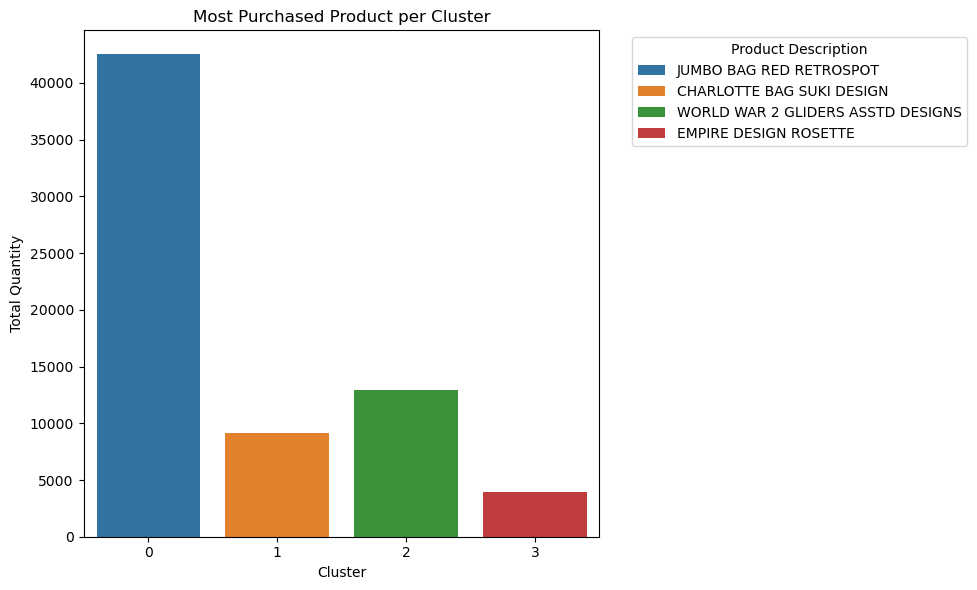

In [52]:
most_purchased = (
    df_clustered
    .groupby(['Cluster', 'Description'])['Quantity']
    .sum()
    .reset_index()
)

# For each cluster, get product with max quantity
most_purchased_top = most_purchased.loc[
    most_purchased.groupby('Cluster')['Quantity'].idxmax()
]

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=most_purchased_top, x='Cluster', y='Quantity', hue='Description', dodge=False)
plt.title('Most Purchased Product per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Quantity')
plt.legend(title='Product Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\chahd\AppData\Local\Temp\ipykernel_11748\2407286377.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_per_cluster, x='Cluster', y='Revenue', palette='viridis')


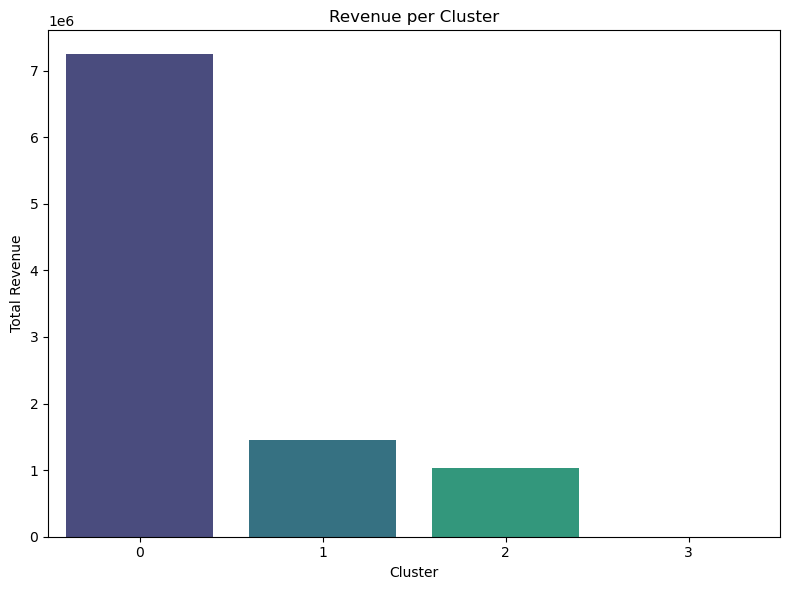

In [56]:
df_clustered['Revenue'] = df_clustered['Quantity'] * df_clustered['UnitPrice']

# Sum revenue per cluster
revenue_per_cluster = df_clustered.groupby('Cluster')['Revenue'].sum().reset_index()

# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=revenue_per_cluster, x='Cluster', y='Revenue', palette='viridis')
plt.title('Revenue per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

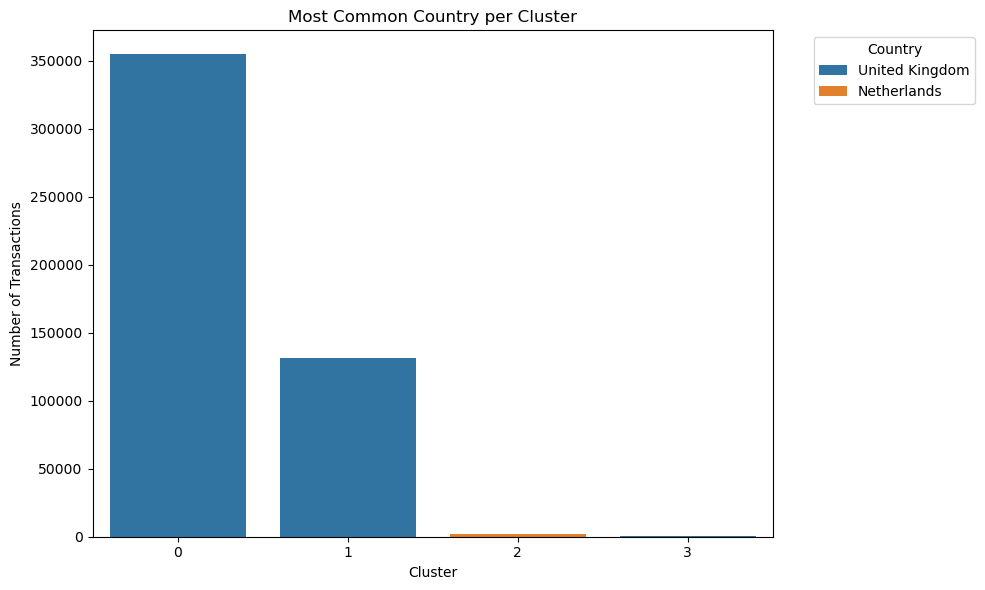

In [58]:
most_country = (
    df_clustered
    .groupby(['Cluster', 'Country'])
    .size()
    .reset_index(name='Count')
)

# Get top country per cluster
top_countries = most_country.loc[
    most_country.groupby('Cluster')['Count'].idxmax()
]

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Cluster', y='Count', hue='Country', dodge=False)
plt.title('Most Common Country per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Transactions')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [61]:
df_clustered.to_csv("clustered_data.csv", index=False)

clustered_data.csv saved in your current working directory.


In [67]:
df1.to_csv("df1.csv", index=False)